In [1]:
# Libraries

import numpy
import os
import shutil
import warnings

In [2]:
# Code

from src.data.analysis import gene_annotation as data_annotation
from src.data.analysis import gene_assembly   as data_assembly
from src.data.analysis import tissue_metadata as data_metadata
from src.data.analysis import tissue_tpm      as data_tpm
from src.data.feature  import annodata        as data_anndata
from src.data.feature  import tsne            as data_tsne
from src.io            import loader          as data_loader
from src.io            import writer          as data_writer

# 1. Setup

In [3]:
# Setup some directory paths

OUT_SUBFOLDER = 'nbp02-anndata'
RES_SUBFOLDER = ''

CWD = os.getcwd()
OUT = os.path.join(CWD, 'out')
RES = os.path.join(CWD, 'res')

OUT_DATA  = os.path.join(OUT, 'data',  OUT_SUBFOLDER)
OUT_PLOT  = os.path.join(OUT, 'plot',  OUT_SUBFOLDER)
RES_NBP01 = os.path.join(OUT, 'data',  'nbp01-analysis')

shutil.rmtree(OUT_DATA, ignore_errors = True)
shutil.rmtree(OUT_PLOT, ignore_errors = True)

os.makedirs(OUT_DATA, exist_ok = True)
os.makedirs(OUT_PLOT, exist_ok = True)

print(f'     Root Directory : {CWD}')
print(f'   Output Directory : {OUT}')
print(f' Resource Directory : {RES}')

     Root Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis
   Output Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\out
 Resource Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\res


In [4]:
# Load the updated and synchronized data

tissue_metadata = data_loader.load_csv(
	filename = os.path.join(RES_NBP01, 'tissue-metadata.csv')
)

tissue_tpm = data_loader.load_csv(
	filename = os.path.join(RES_NBP01, 'tissue-tpm.csv')
)

In [5]:
# Define layer mapping

mapping = {
	'log1p'    : None,
	'boxcox1p' : None,
	'normal'   : 'boxcox1p',
	'standard' : 'boxcox1p'
}

# 2. Anndata

In [6]:
# Create anndata object from the metadata and tpm tables

from anndata import AnnData

with warnings.catch_warnings() :
	warnings.simplefilter('ignore')

	anndata = data_anndata.create_anndata(
		mat = tissue_tpm,
		obs = tissue_metadata
	)

data_anndata.show_structure(anndata)

AnnData object with n_obs × n_vars = 4138 × 34319
    obs: 'Study', 'Control', 'Senescence', 'Age', 'Tissue', 'Group', 'Perturbation'


In [7]:
# Display anndata tpm matrix information

data_anndata.show_matrix(anndata, layer = None)

   Max value : 532,571.0
  Mean value :      27.5 ± 274.09335
Median value :       3.6
   Min value :       0.0

Total elements          : 142,012,022
Total elements =    0.0 :  17,889,588 [ 12.60 %]
Total elements >    0.0 : 124,122,434 [ 87.40 %]
Total elements >    1.0 :  98,015,717 [ 69.02 %]
Total elements >   10.0 :  45,655,564 [ 32.15 %]
Total elements >   50.0 :  12,670,316 [  8.92 %]
Total elements >  100.0 :   6,221,620 [  4.38 %]
Total elements >  250.0 :   2,234,839 [  1.57 %]

[[ 17.954   2.140  11.186   0.000   0.815   0.865   7.954   0.000  115.884   3.965]
 [ 19.723   0.000   8.385   3.607   1.341   1.536   8.971   1.105  121.833   1.404]
 [ 30.892   0.502  10.543   0.000   0.484   0.678  11.866   1.070  136.181  11.309]
 [ 25.349   1.455  12.320   3.263   0.000   0.655   9.906   0.226  139.984   7.541]
 [ 29.913   2.084   9.219   0.622   0.871   1.533   4.785   7.057  158.566   0.000]]


# 3. Log

In [8]:
# Compute and save the log1p tpm values

anndata = data_anndata.compute_log1p(
	data       = anndata,
	layer      = mapping['log1p'],
	base       = 2,
	store_into = 'log1p'
)

In [9]:
# Display anndata log1p tpm matrix information

data_anndata.show_matrix(anndata, layer = 'log1p')

   Max value :  19.02262
  Mean value :   2.54402 ± 2.15983
Median value :   2.21290
   Min value :   0.00000

Total elements        : 142,012,022
Total elements =  0.0 :  17,889,588 [ 12.60 %]
Total elements >  0.0 : 124,122,434 [ 87.40 %]
Total elements >  1.0 :  98,015,717 [ 69.02 %]
Total elements >  3.0 :  54,764,893 [ 38.56 %]
Total elements >  5.0 :  19,886,115 [ 14.00 %]
Total elements >  7.0 :   4,814,984 [  3.39 %]
Total elements >  9.0 :     908,806 [  0.64 %]

[[  4.244   1.651   3.607   0.000   0.860   0.899   3.162   0.000   6.869   2.312]
 [  4.373   0.000   3.230   2.204   1.227   1.343   3.318   1.074   6.941   1.266]
 [  4.995   0.586   3.529   0.000   0.570   0.746   3.685   1.050   7.100   3.622]
 [  4.720   1.296   3.736   2.092   0.000   0.727   3.447   0.293   7.139   3.094]
 [  4.950   1.625   3.353   0.698   0.904   1.341   2.532   3.010   7.318   0.000]]


## 3.1 Distribution

Function : numpy.mean
Genes below 10th percentile [   0.497048] :  3,432
Genes below 30th percentile [   1.258693] : 10,296
Genes above 70th percentile [   3.393854] : 10,296
Genes above 90th percentile [   5.050876] :  3,432

Function : numpy.amax
Genes below 10th percentile [   4.066821] :  3,432
Genes below 30th percentile [   5.345435] : 10,296
Genes above 70th percentile [   7.550942] : 10,296
Genes above 90th percentile [   9.609912] :  3,432

Function : numpy.std
Genes below 10th percentile [   0.590444] :  3,432
Genes below 30th percentile [   0.795764] : 10,296
Genes above 70th percentile [   1.180695] : 10,296
Genes above 90th percentile [   1.676455] :  3,432



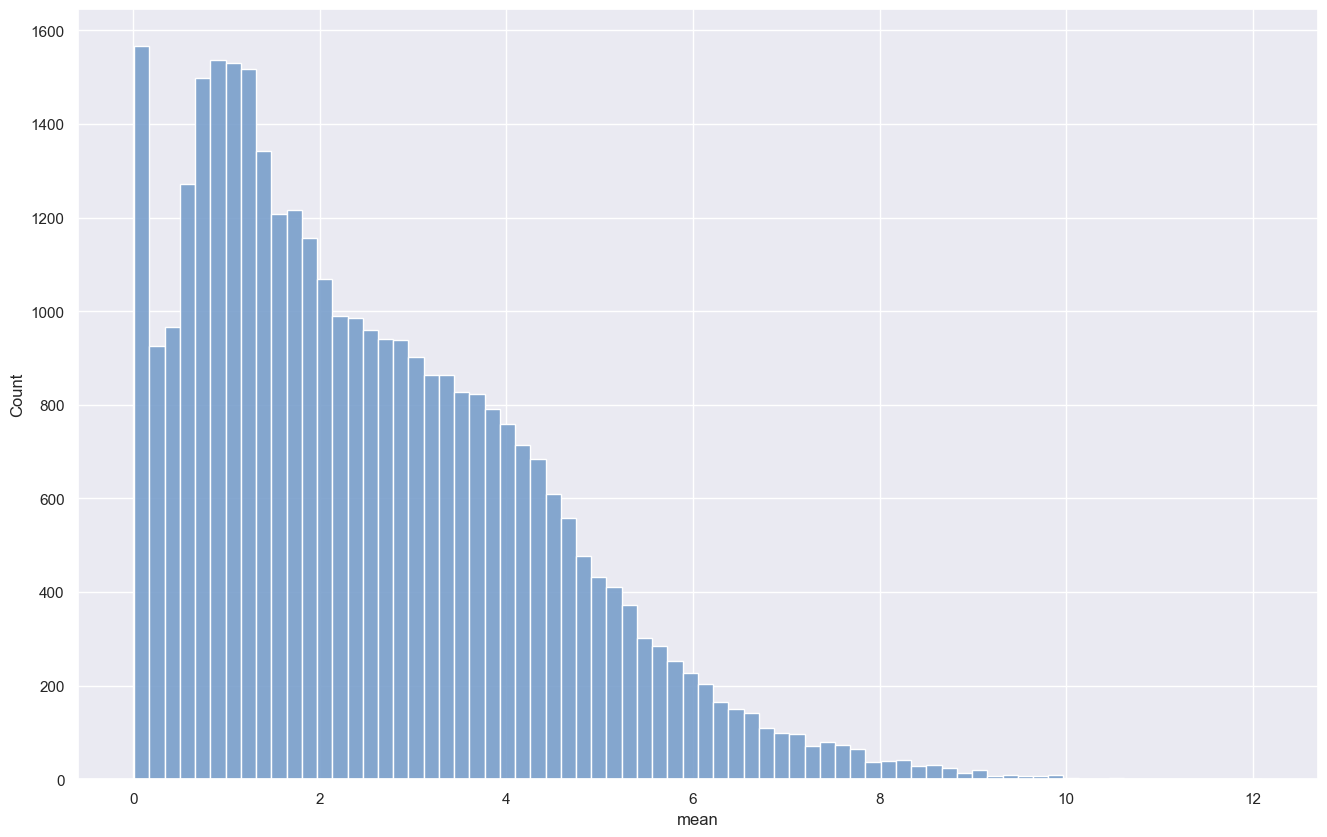

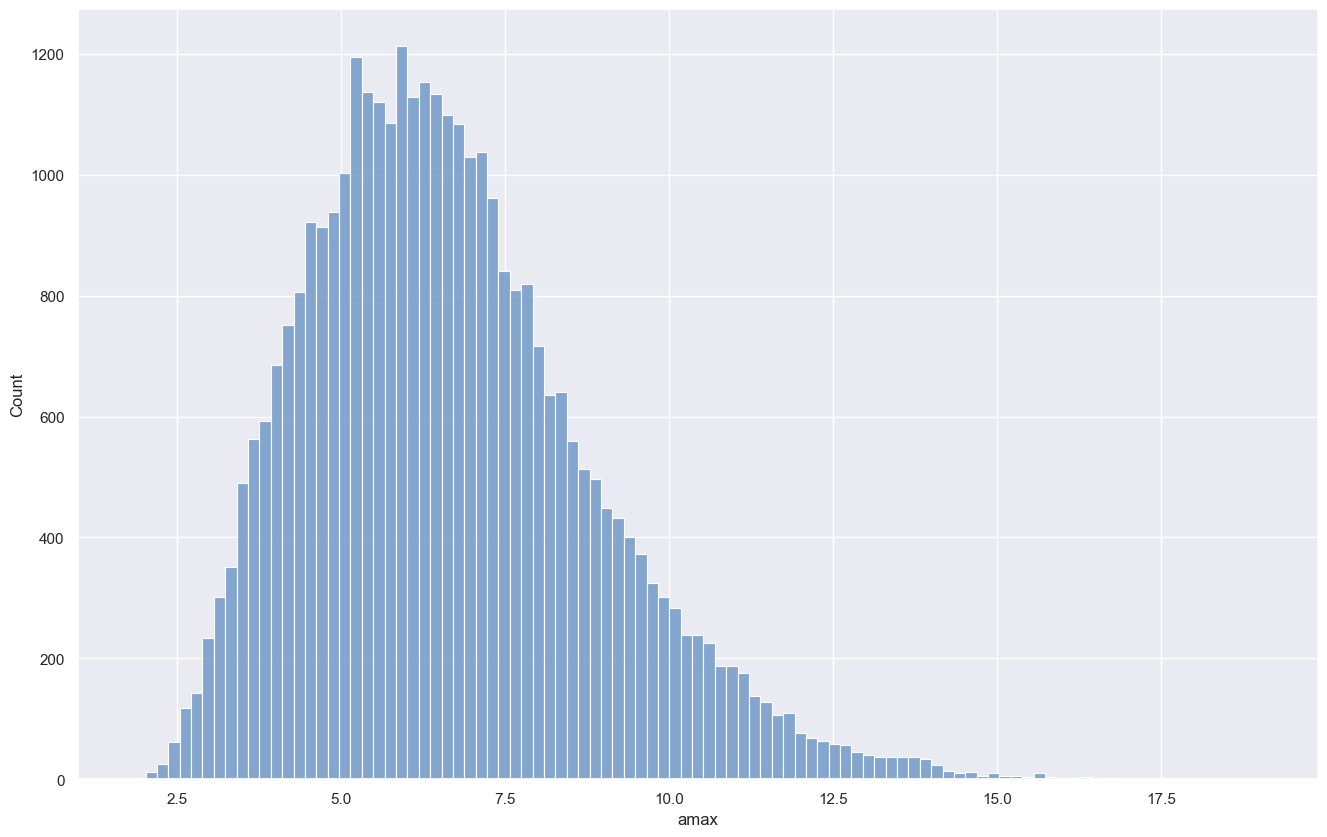

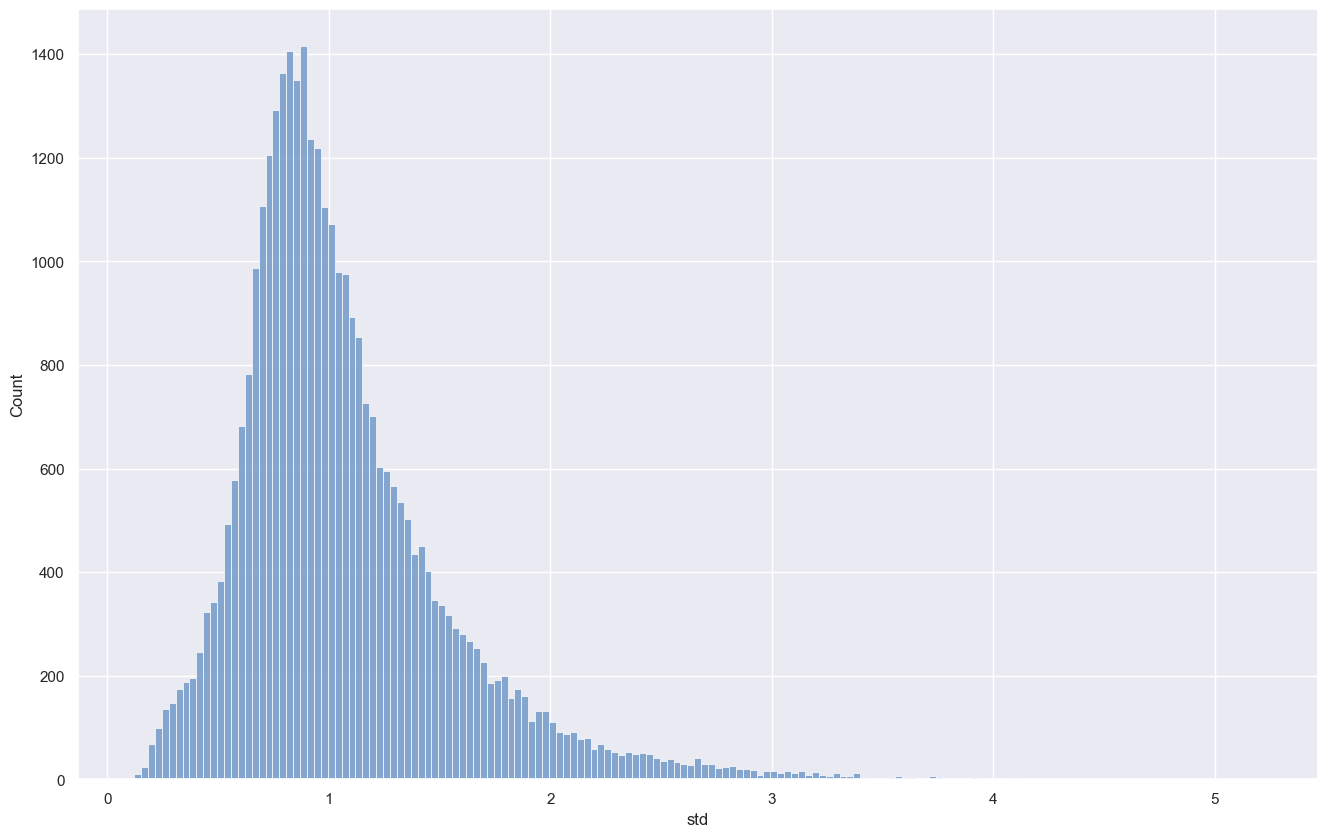

In [10]:
# Display log1p tpm value distribution per gene

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'log1p',
	function = numpy.mean,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-log1p-mean')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'log1p',
	function = numpy.max,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-log1p-max')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'log1p',
	function = numpy.std,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-log1p-std')
)

## 3.2 Genes

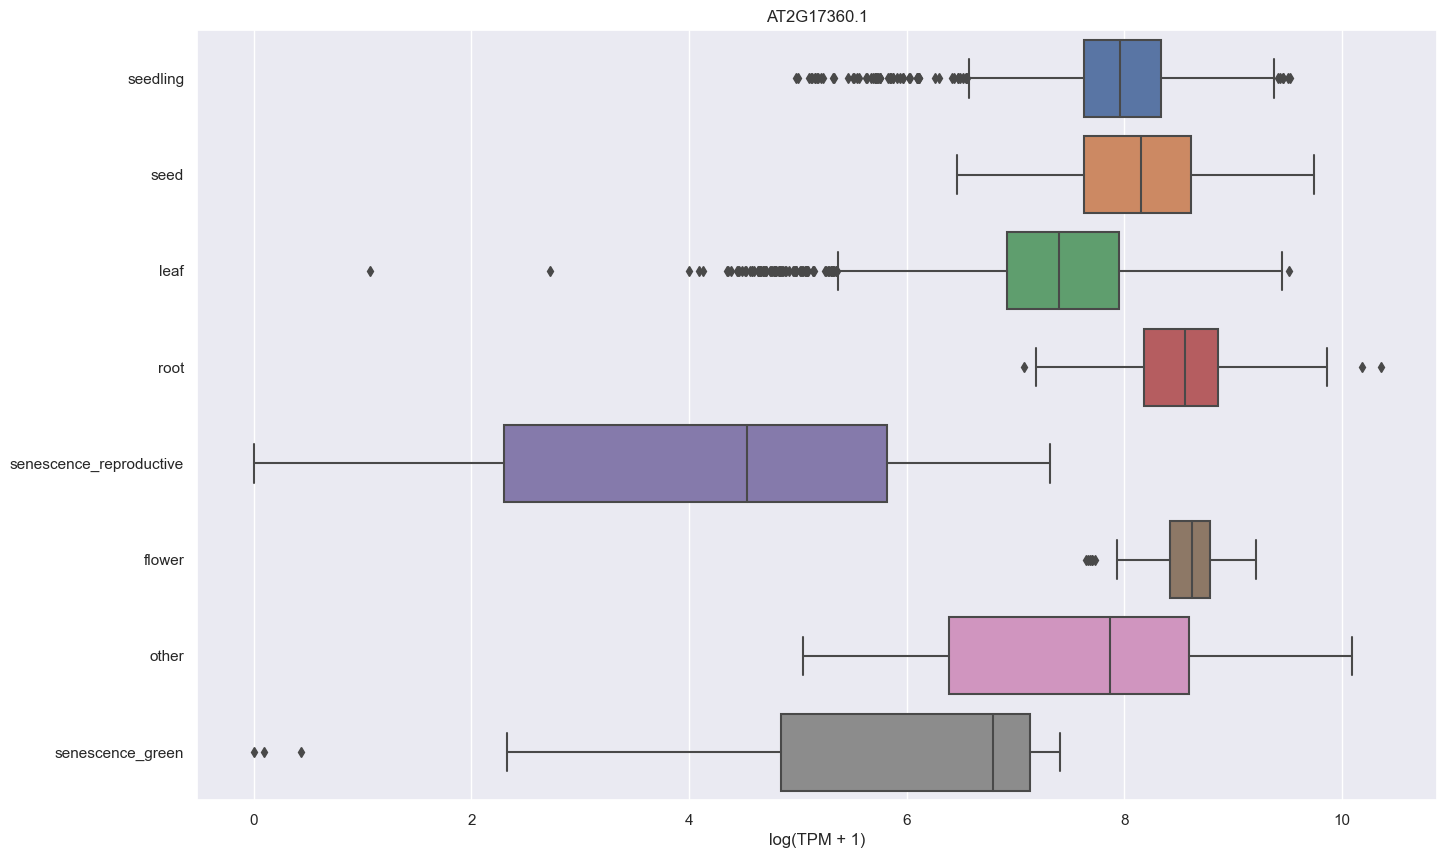

In [11]:
# Display an example of a high-expressive gene <AT2G17360.1>

gene = 'AT2G17360.1'

if gene in anndata.var.index :
	data_anndata.gene_boxplot(
		data     = anndata,
		gene     = gene,
		groupby  = 'Tissue',
		layer    = 'log1p',
		filename = os.path.join(OUT_PLOT, 'tissue-log1p-' + gene)
	)

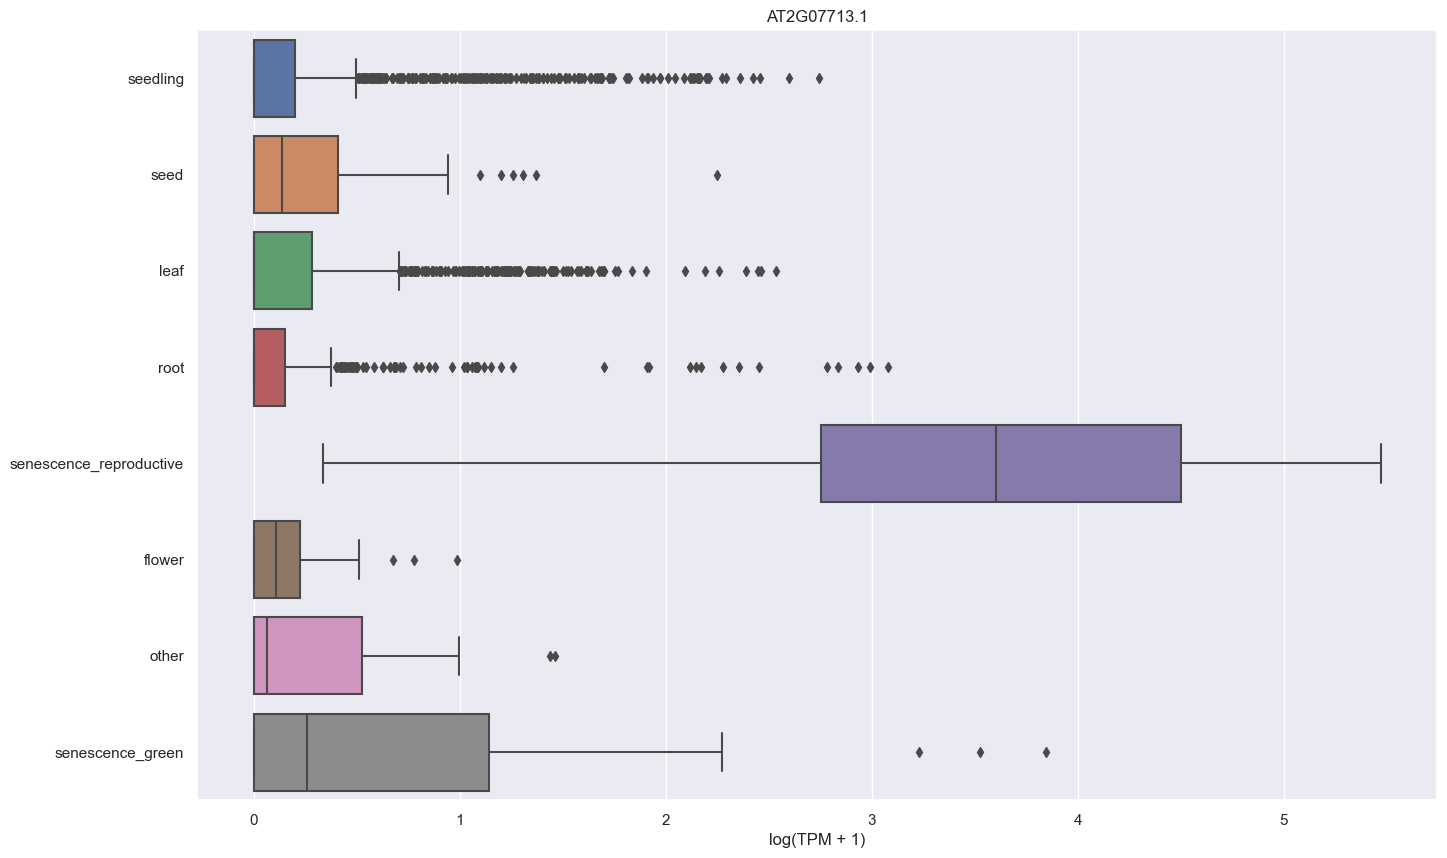

In [12]:
# Display an example of a tissue-specific expressive gene <AT2G07713.1>

gene = 'AT2G07713.1'

if gene in anndata.var.index :
	data_anndata.gene_boxplot(
		data     = anndata,
		gene     = gene,
		groupby  = 'Tissue',
		layer    = 'log1p',
		filename = os.path.join(OUT_PLOT, 'tissue-log1p-' + gene)
	)

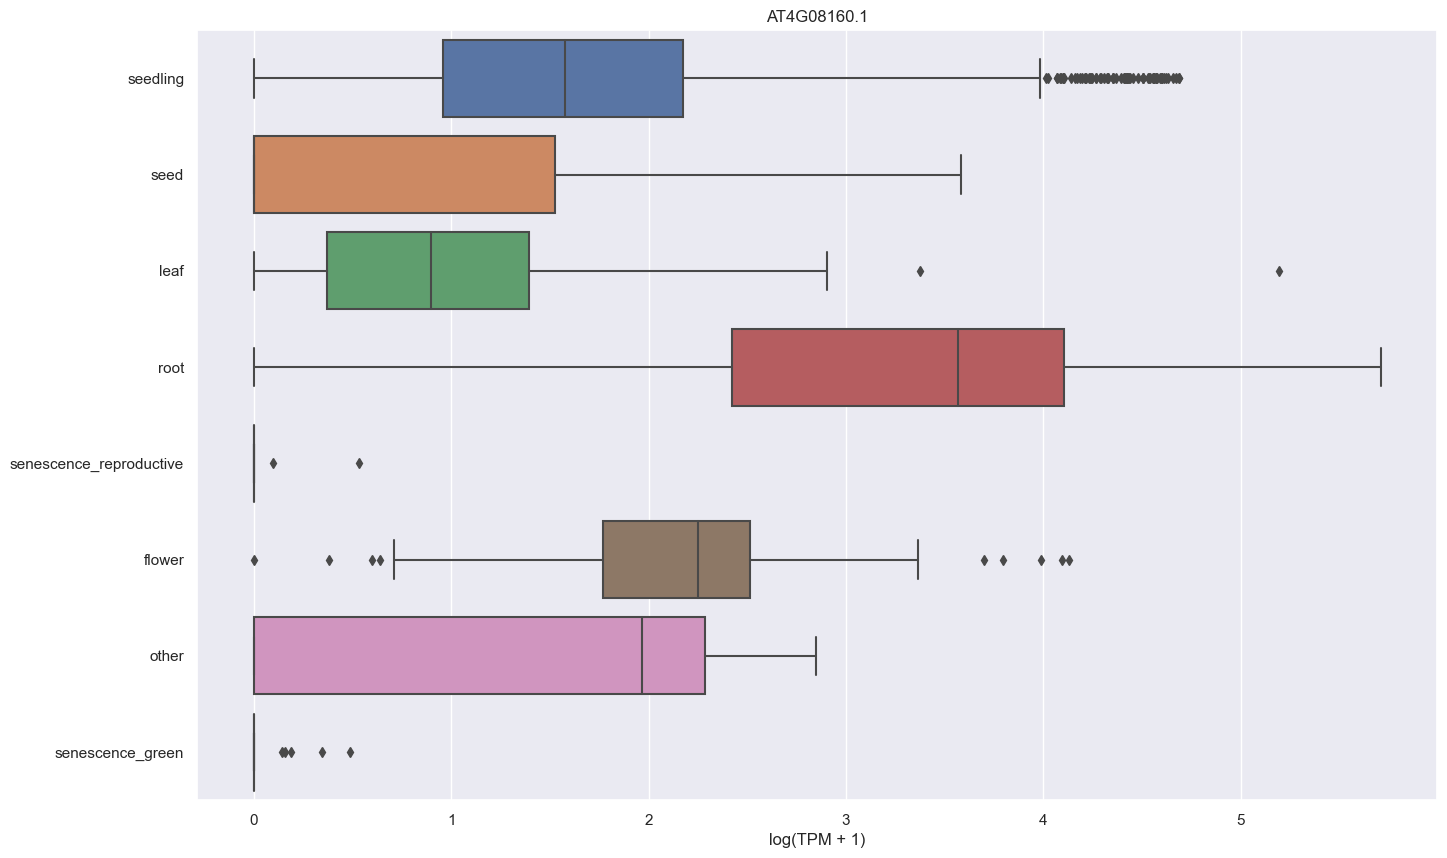

In [13]:
# Display an example of a tissue-prevelant expressive gene <AT4G08160.1>

gene = 'AT4G08160.1'

if gene in anndata.var.index :
	data_anndata.gene_boxplot(
		data     = anndata,
		gene     = gene,
		groupby  = 'Tissue',
		layer    = 'log1p',
		filename = os.path.join(OUT_PLOT, 'tissue-log1p-' + gene)
	)

# 4. BoxCox

In [14]:
# Compute and save the boxcox1p tpm values

anndata = data_anndata.compute_boxcox1p(
	data       = anndata,
	store_into = 'boxcox1p',
	layer      = mapping['boxcox1p'],
	eps        = 1.0
)

boxcox1p lambda : -0.2405820974347097


In [15]:
# Display anndata boxcox1p tpm matrix information

data_anndata.show_matrix(anndata, layer = 'boxcox1p')

   Max value :   3.98238
  Mean value :   1.27176 ± 0.91800
Median value :   1.28268
   Min value :   0.00000

Total elements        : 142,012,022
Total elements =  0.0 :  17,889,588 [ 12.60 %]
Total elements >  0.0 : 124,122,434 [ 87.40 %]
Total elements >  1.0 :  83,198,264 [ 58.59 %]
Total elements >  2.0 :  36,653,688 [ 25.81 %]
Total elements >  3.0 :   2,851,081 [  2.01 %]

[[  2.109   1.000   1.879   0.000   0.555   0.579   1.704   0.000   2.834   1.330]
 [  2.152   0.000   1.731   1.278   0.769   0.834   1.766   0.681   2.850   0.791]
 [  2.350   0.387   1.849   0.000   0.377   0.486   1.908   0.667   2.884   1.884]
 [  2.265   0.808   1.927   1.224   0.000   0.474   1.817   0.198   2.893   1.676]
 [  2.336   0.987   1.780   0.457   0.581   0.833   1.432   1.640   2.930   0.000]]


## 4.1 Distribution

Function : numpy.mean
Genes below 10th percentile [   0.302069] :  3,432
Genes below 30th percentile [   0.737874] : 10,296
Genes above 70th percentile [   1.739448] : 10,296
Genes above 90th percentile [   2.322695] :  3,432

Function : numpy.amax
Genes below 10th percentile [   2.046949] :  3,432
Genes below 30th percentile [   2.452045] : 10,296
Genes above 70th percentile [   2.976593] : 10,296
Genes above 90th percentile [   3.319512] :  3,432

Function : numpy.std
Genes below 10th percentile [   0.278031] :  3,432
Genes below 30th percentile [   0.359009] : 10,296
Genes above 70th percentile [   0.539254] : 10,296
Genes above 90th percentile [   0.732343] :  3,432



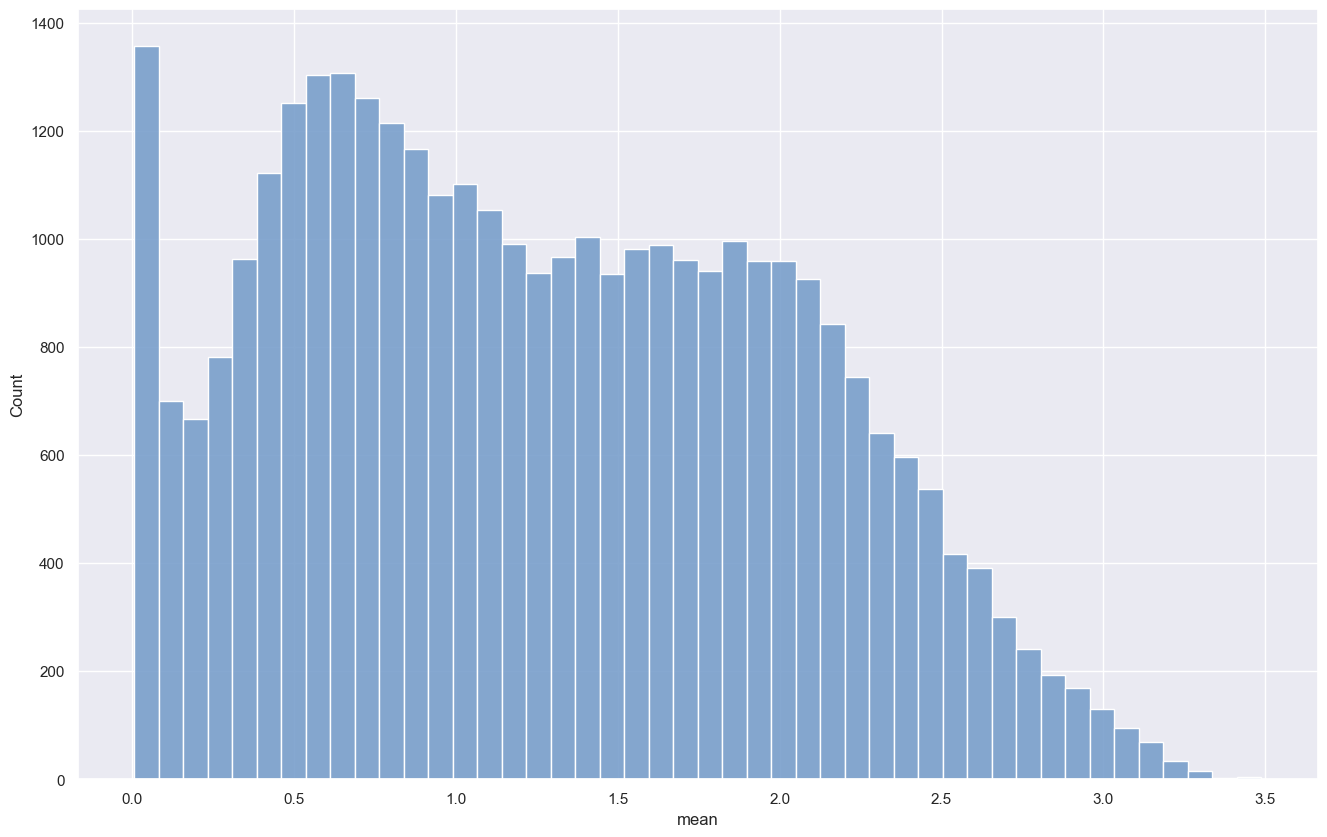

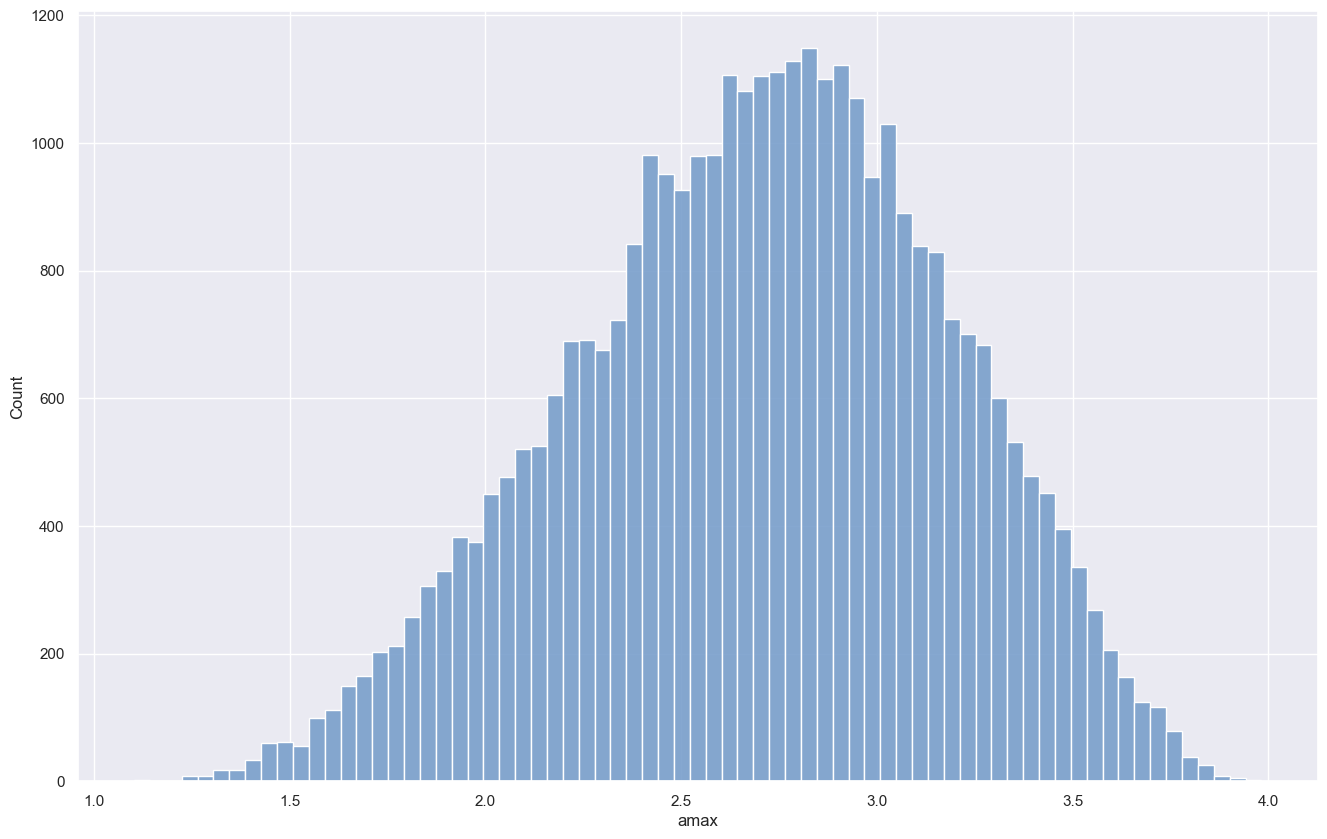

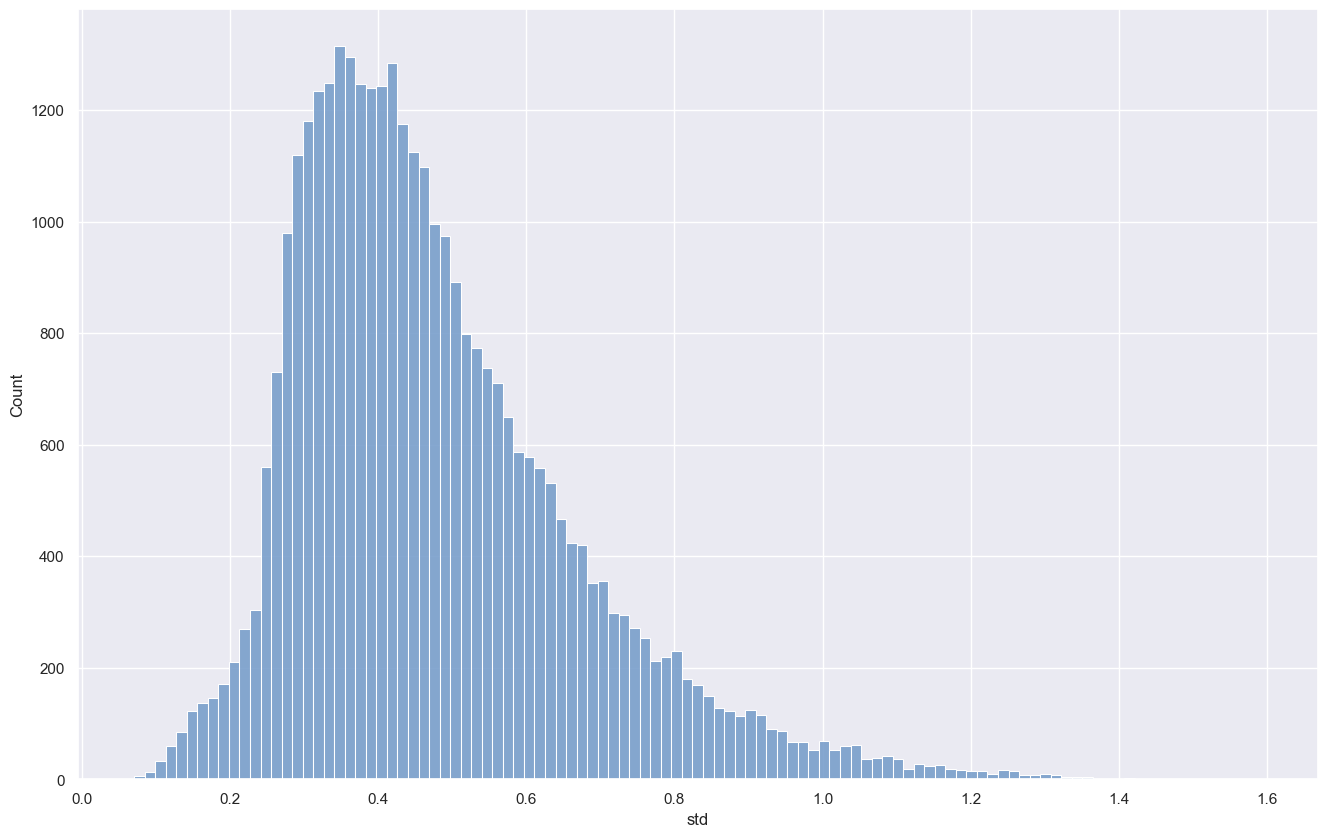

In [16]:
# Display boxcox1p tpm value distribution per gene

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'boxcox1p',
	function = numpy.mean,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-boxcox1p-mean')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'boxcox1p',
	function = numpy.max,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-boxcox1p-max')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'boxcox1p',
	function = numpy.std,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-boxcox1p-std')
)

## 4.2 Genes

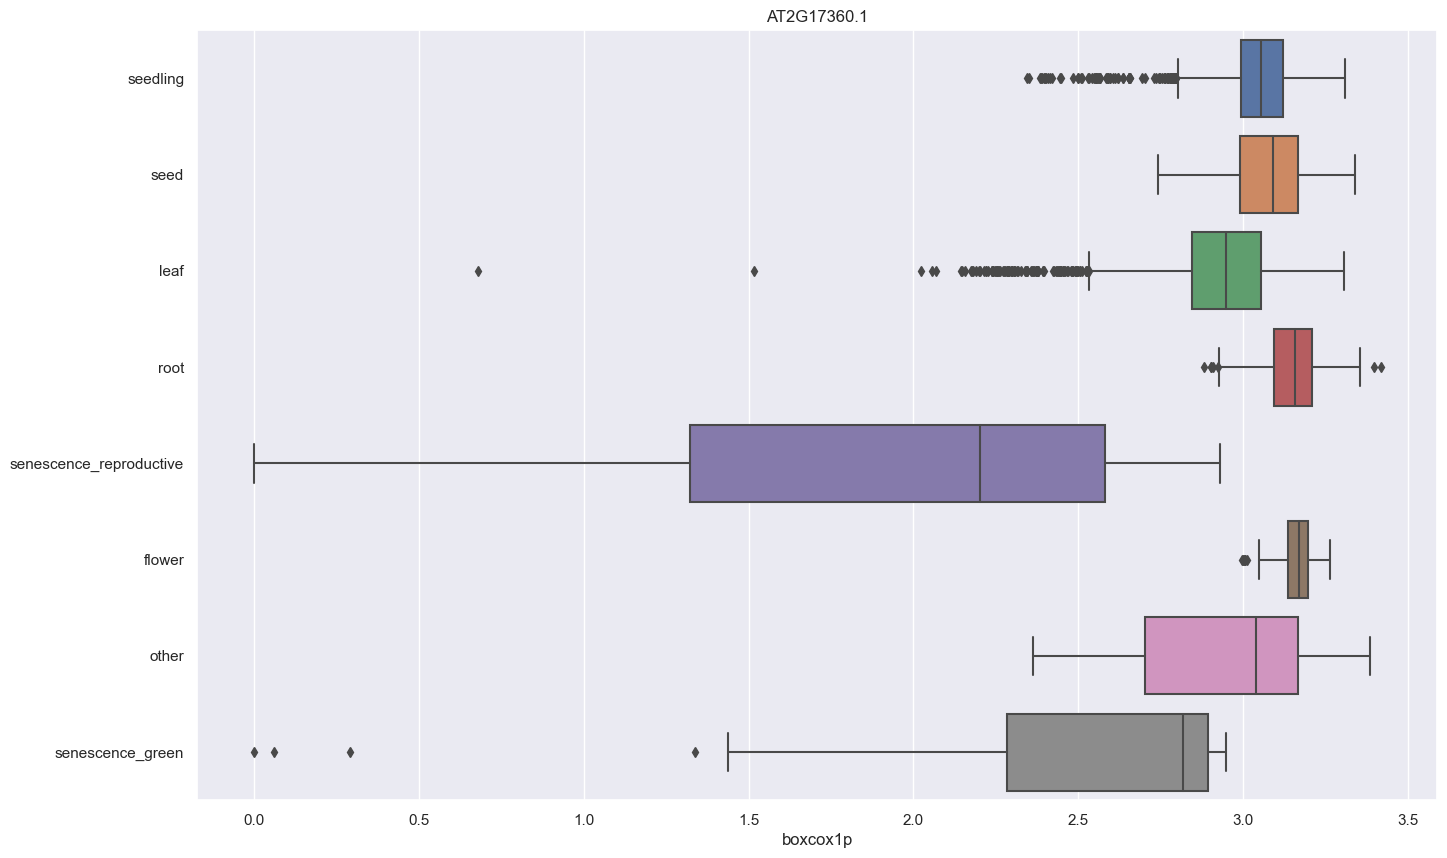

In [17]:
# Display an example of a high-expressive gene <AT2G17360.1>

gene = 'AT2G17360.1'

if gene in anndata.var.index :
	data_anndata.gene_boxplot(
		data     = anndata,
		gene     = gene,
		groupby  = 'Tissue',
		layer    = 'boxcox1p',
		filename = os.path.join(OUT_PLOT, 'tissue-boxcox1p-' + gene)
	)

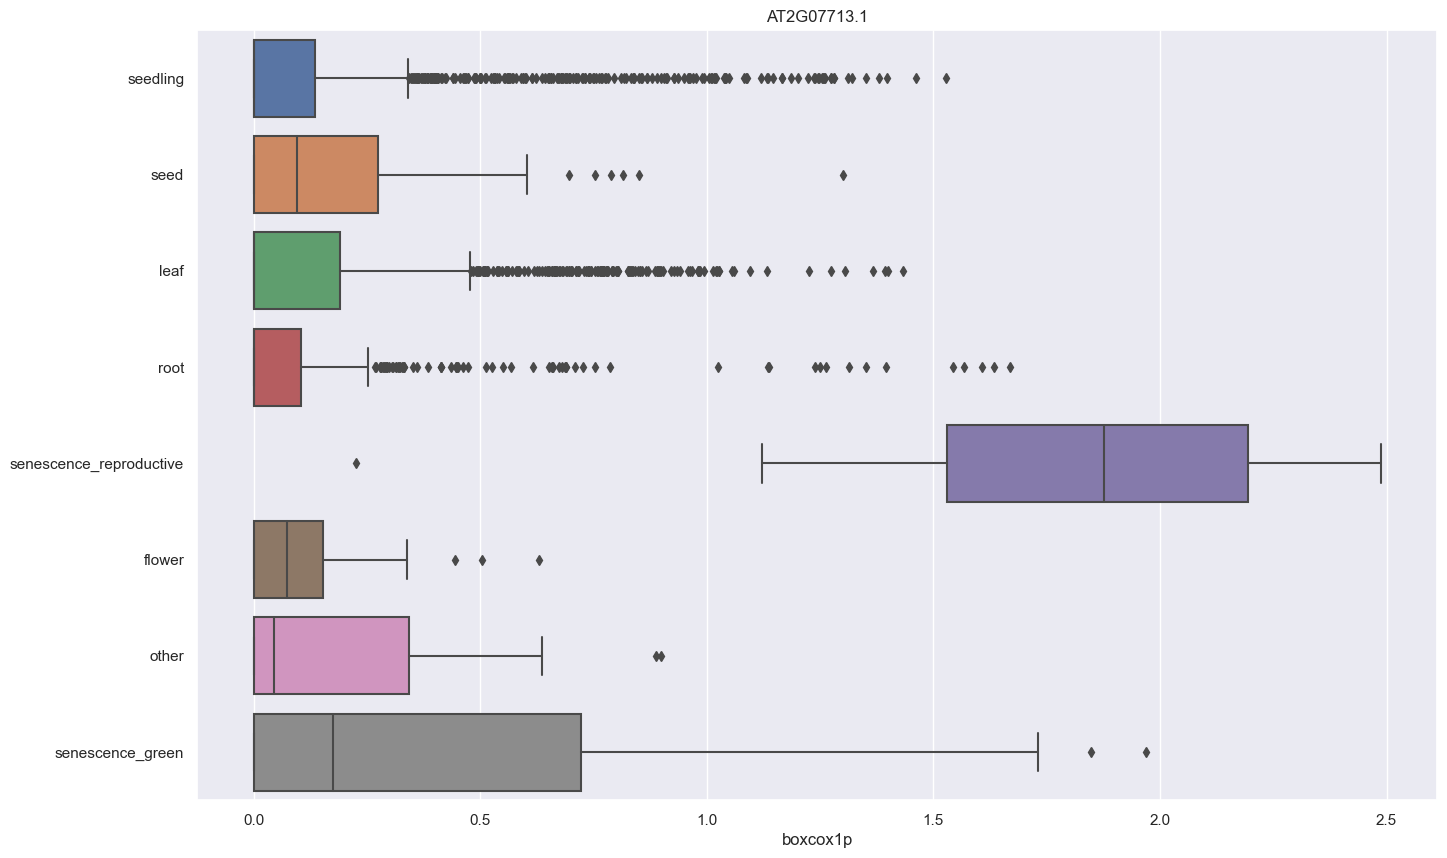

In [18]:
# Display an example of a tissue-specific expressive gene <AT2G07713.1>

gene = 'AT2G07713.1'

if gene in anndata.var.index :
	data_anndata.gene_boxplot(
		data     = anndata,
		gene     = gene,
		groupby  = 'Tissue',
		layer    = 'boxcox1p',
		filename = os.path.join(OUT_PLOT, 'tissue-boxcox1p-' + gene)
	)

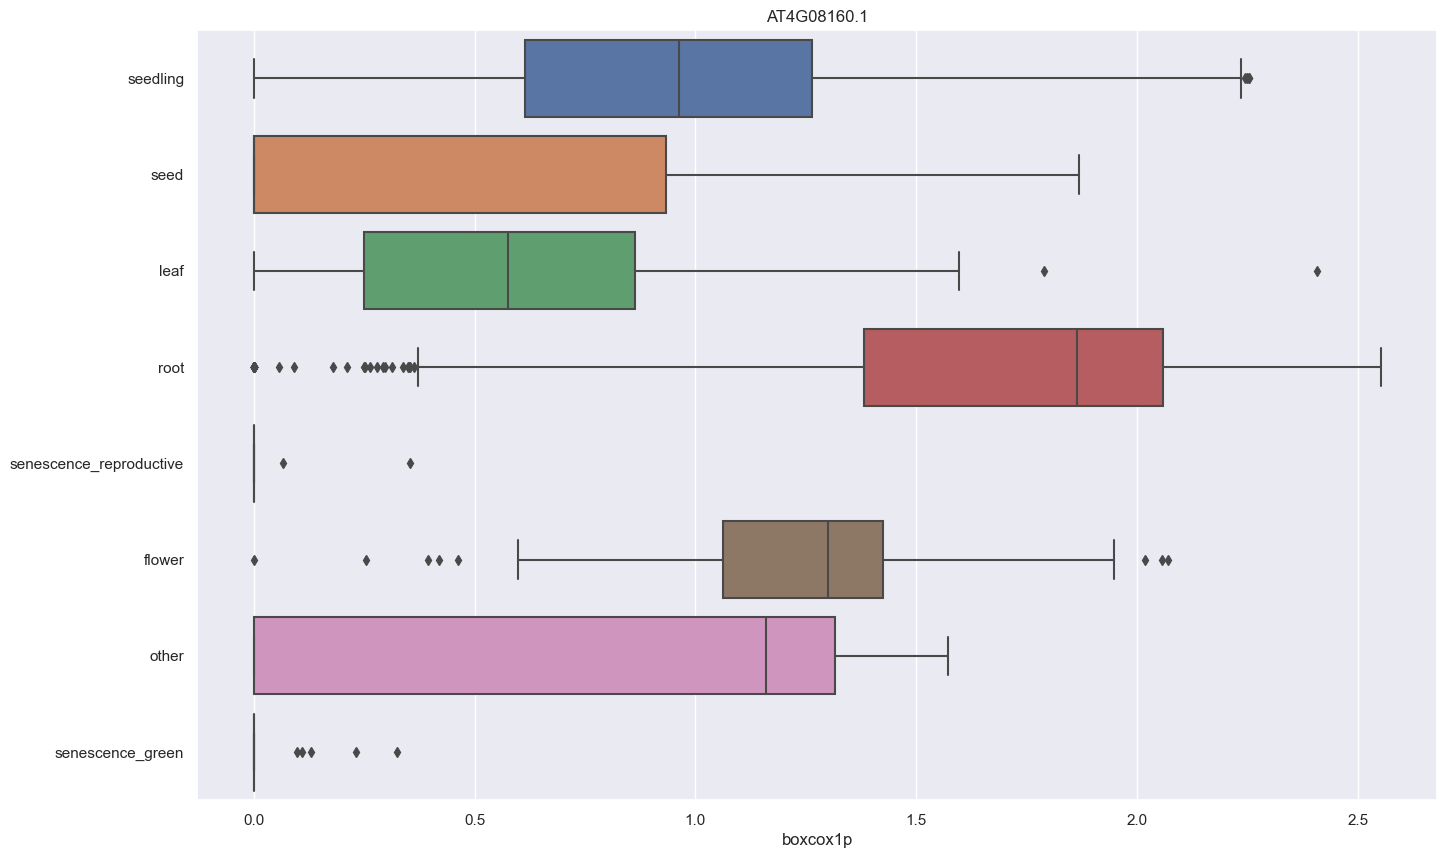

In [19]:
# Display an example of a tissue-prevelant expressive gene <AT4G08160.1>

gene = 'AT4G08160.1'

if gene in anndata.var.index :
	data_anndata.gene_boxplot(
		data     = anndata,
		gene     = gene,
		groupby  = 'Tissue',
		layer    = 'boxcox1p',
		filename = os.path.join(OUT_PLOT, 'tissue-boxcox1p-' + gene)
	)

# 5. Normal

In [20]:
# Compute and save the normalized tpm values

anndata = data_anndata.compute_normalized(
	data       = anndata,
	layer      = mapping['normal'],
	store_into = 'normal'
)

normalize min_value : 0.0
normalize max_value : 3.9823754592208442


In [21]:
# Display normalized log1p tpm matrix information

data_anndata.show_matrix(anndata, layer = 'normal')

   Max value :   1.00000
  Mean value :   0.31935 ± 0.23052
Median value :   0.32209
   Min value :   0.00000

Total elements        : 142,012,022
Total elements =  0.0 :  17,889,588 [ 12.60 %]
Total elements >  0.0 : 124,122,434 [ 87.40 %]
Total elements >  0.1 : 107,328,956 [ 75.58 %]
Total elements >  0.3 :  74,860,712 [ 52.71 %]
Total elements >  0.5 :  37,101,278 [ 26.13 %]
Total elements >  0.7 :   6,211,670 [  4.37 %]

[[  0.529   0.251   0.472   0.000   0.139   0.145   0.428   0.000   0.712   0.334]
 [  0.540   0.000   0.435   0.321   0.193   0.209   0.444   0.171   0.716   0.199]
 [  0.590   0.097   0.464   0.000   0.095   0.122   0.479   0.168   0.724   0.473]
 [  0.569   0.203   0.484   0.307   0.000   0.119   0.456   0.050   0.726   0.421]
 [  0.587   0.248   0.447   0.115   0.146   0.209   0.360   0.412   0.736   0.000]]


## 5.1 Distribution

Function : numpy.mean
Genes below 10th percentile [   0.075852] :  3,432
Genes below 30th percentile [   0.185285] : 10,296
Genes above 70th percentile [   0.436786] : 10,296
Genes above 90th percentile [   0.583244] :  3,432

Function : numpy.amax
Genes below 10th percentile [   0.514002] :  3,432
Genes below 30th percentile [   0.615724] : 10,296
Genes above 70th percentile [   0.747442] : 10,296
Genes above 90th percentile [   0.833551] :  3,432

Function : numpy.std
Genes below 10th percentile [   0.069815] :  3,432
Genes below 30th percentile [   0.090150] : 10,296
Genes above 70th percentile [   0.135410] : 10,296
Genes above 90th percentile [   0.183896] :  3,432



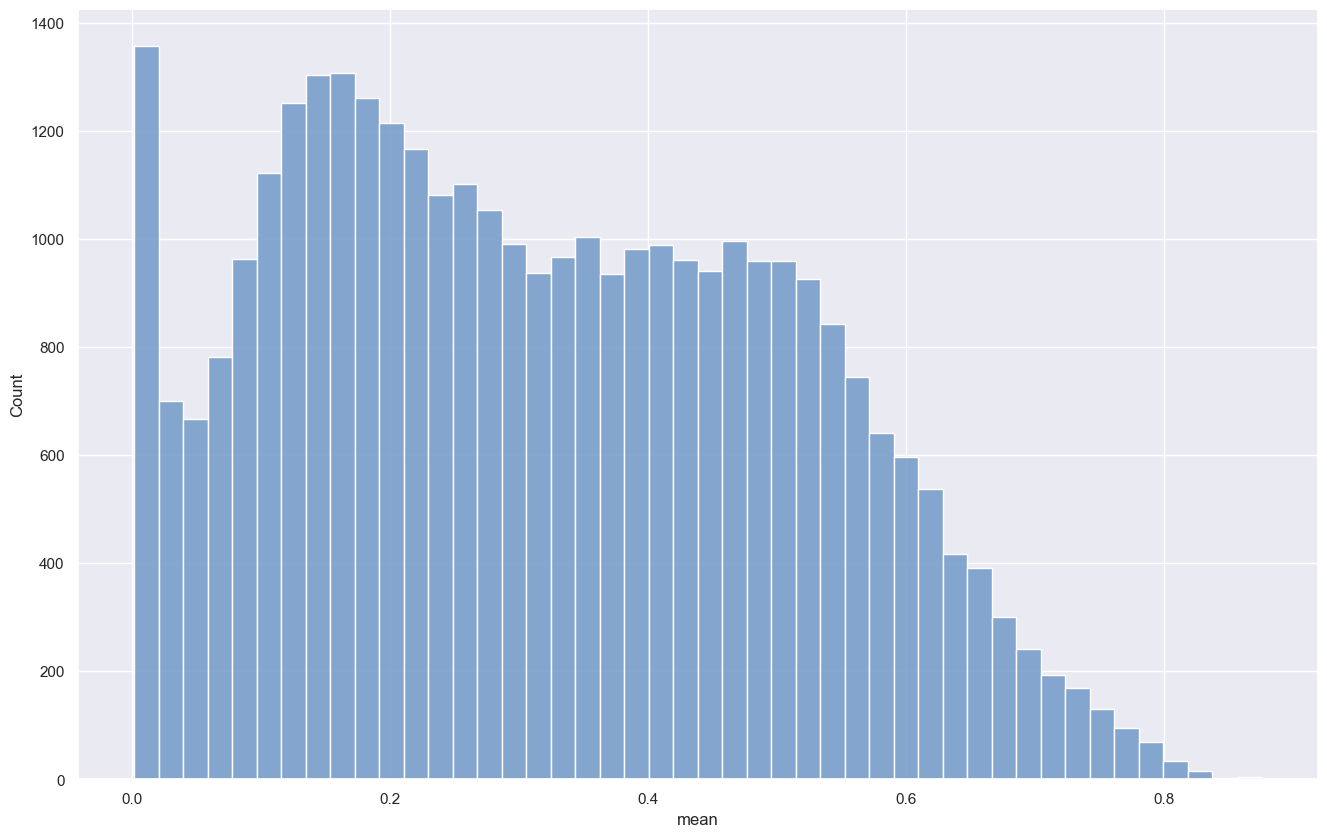

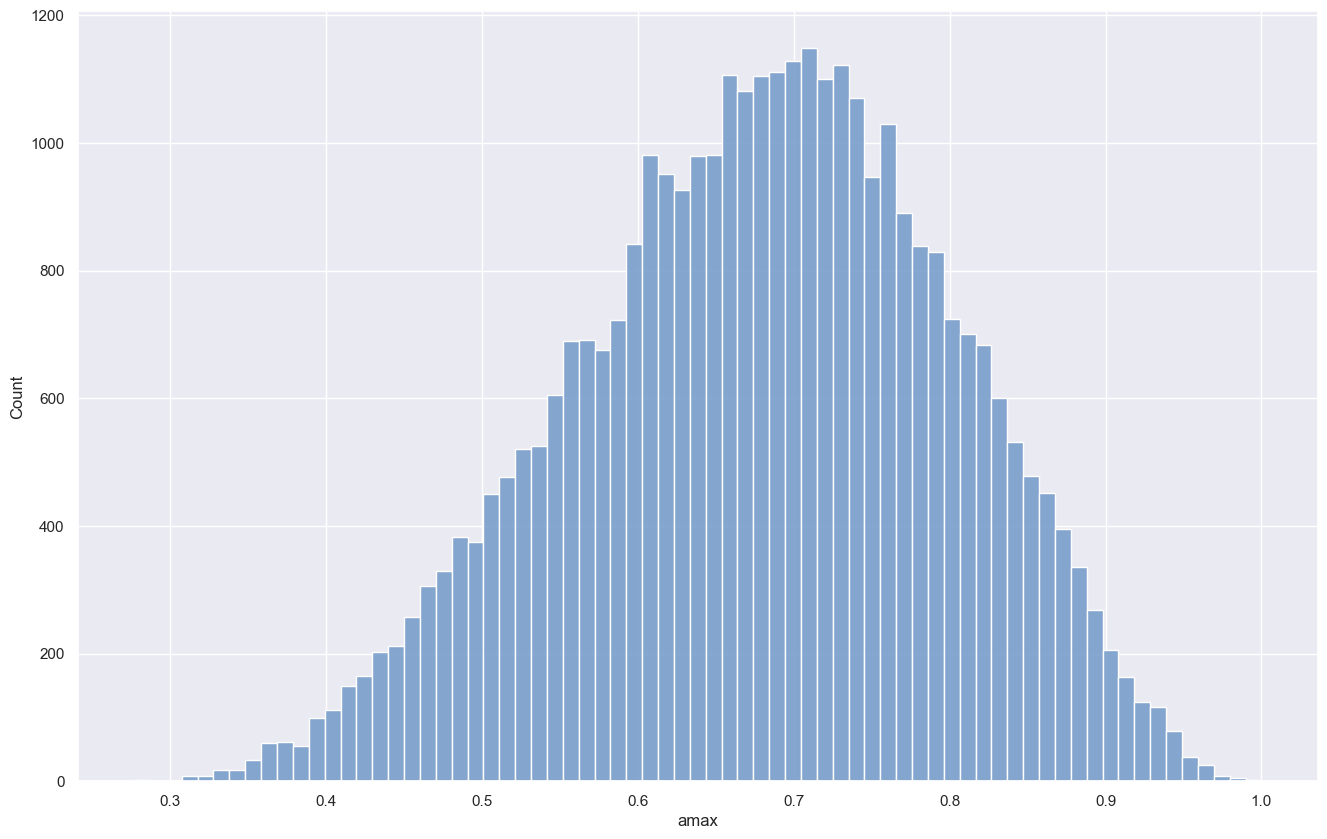

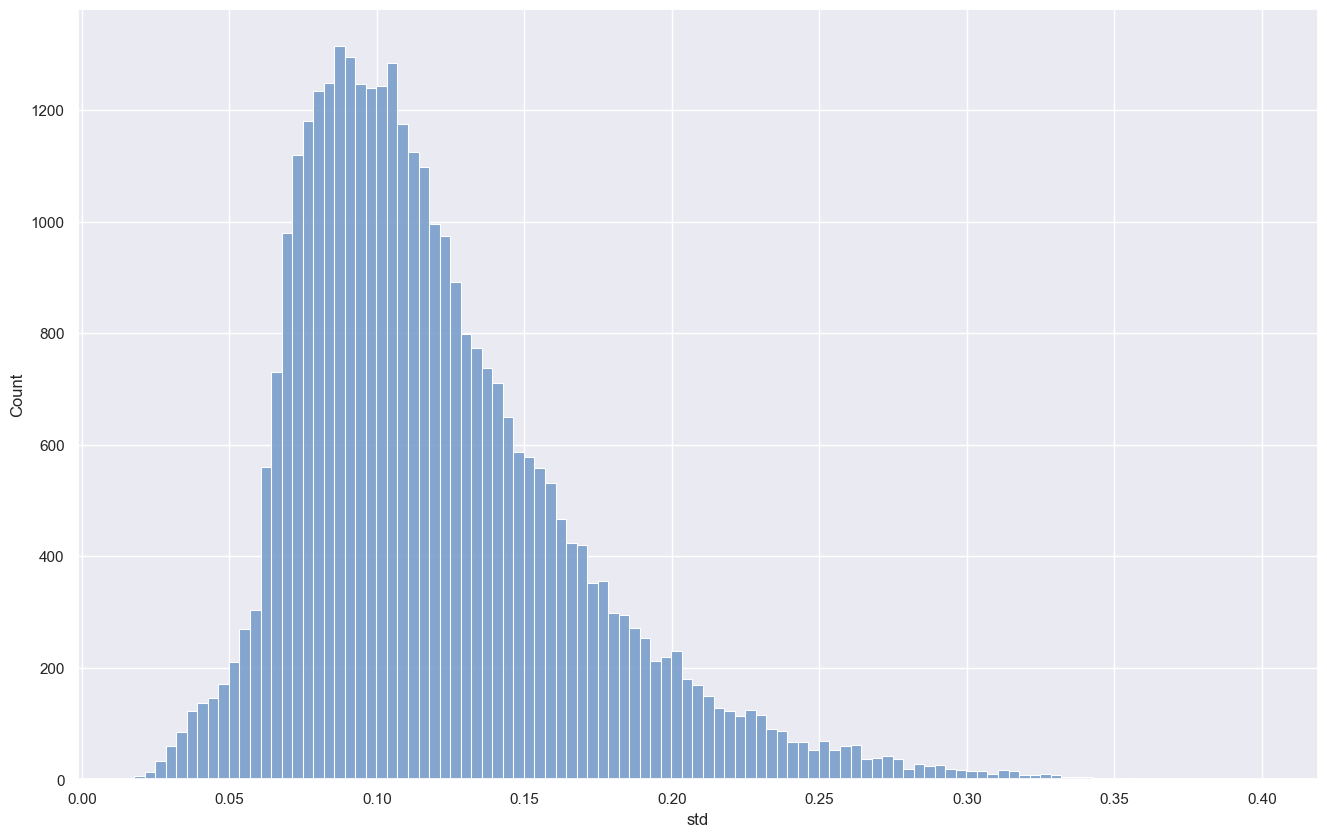

In [22]:
# Display normalized tpm value distribution per gene

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'normal',
	function = numpy.mean,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-normal-mean')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'normal',
	function = numpy.max,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-normal-max')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'normal',
	function = numpy.std,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-normal-std')
)

# 6. Standard

In [23]:
# Compute and save the standardized tpm values

anndata = data_anndata.compute_standardized(
	data       = anndata,
	layer      = mapping['standard'],
	store_into = 'standard',
	axis       = 0
)

In [24]:
# Display anndata standardized tpm matrix information

data_anndata.show_matrix(anndata, layer = 'standard')

   Max value :  29.27071
  Mean value :   0.00000 ± 1.00000
Median value :   0.01322
   Min value : -19.60701

Total elements        : 142,012,022
Total elements < -5.0 :     112,684 [  0.08 %]
Total elements < -2.0 :   3,588,940 [  2.53 %]
Total elements < -1.0 :  18,776,224 [ 13.22 %]
Total elements < -0.5 :  40,463,497 [ 28.49 %]
Total elements < -0.3 :  50,676,380 [ 35.68 %]
Total elements < -0.0 :  70,297,849 [ 49.50 %]
Total elements =  0.0 :           0 [  0.00 %]
Total elements >  0.0 :  71,714,173 [ 50.50 %]
Total elements >  0.3 :  54,902,682 [ 38.66 %]
Total elements >  0.5 :  43,244,940 [ 30.45 %]
Total elements >  1.0 :  18,583,487 [ 13.09 %]
Total elements >  2.0 :   2,353,127 [  1.66 %]
Total elements >  5.0 :     122,741 [  0.09 %]

[[  0.982   0.007   1.101  -1.435  -0.379  -0.808   0.497  -2.226   0.460   0.791]
 [  1.062  -1.450   0.876   1.019   0.180  -0.255   0.654  -0.895   0.516   0.123]
 [  1.429  -0.886   1.055  -1.435  -0.847  -1.009   1.009  -0.922   0.638  

# 7. Save

In [25]:
# Save the annotated data with multiple layers

data_writer.write_h5ad(
	data     = anndata,
	filename = os.path.join(OUT_DATA, 'arabidopsis-r36.h5ad')
)